<img src="https://images.unsplash.com/photo-1466096115517-bceecbfb6fde?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjEyMDd9&s=427bcc1d8e2505d31a239d0de6b13f75&auto=format&fit=crop&w=1950&q=80"  width="900" height="400">

This excercise will help us to get started with navie bayes generative classifier and using tools(pandas, sklearn etc) from python eco system.

**Problem statement:** classify SMS messages as *HAM* or *SPAM* using **naive bayes** in supervised machine setting.
See this link to get an idea supervised learning workflow [supervsed learning workflow](http://www.allprogrammingtutorials.com/tutorials/introduction-to-machine-learning.php)

**Dataset:** We will use [SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) from UCI machine learning repository.

credit:

- This notebook has taken text processing idea from
https://radimrehurek.com/data_science_python/
- some of the images are from https://cdn.pixabay.com
- https://unsplash.com


Running this notebook with anaconda installation requires installing Textblob libray for text processing



# Running following commands to install Textblob 

Here is more infomation about [textblob](https://textblob.readthedocs.io/en/dev/)

In [1]:
import os

In [2]:
# output should be 0 aftger successful install
# run this only once. Comment later
#os.system('conda install -c conda-forge textblob')

In [3]:
#Must for inline plot
%matplotlib inline 
import requests
import numpy as np
import pprint # for pretty printing
import os # listing and managing file patho
import zipfile # for zip and unzip utilities
import pandas # for data analysis
import csv
import matplotlib.pyplot as plt # for plotting
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer # for converting documents in word count


In [4]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
r = requests.get(data_url)
#r.content

Let's download and save the zip file

In [5]:
sms_zip_file = 'smsspamcollection.zip'
#http = urllib3.PoolManager()
with open(sms_zip_file, 'wb') as out_file:
    out_file.write(r.content)

# Let's verify it. 
**make sure output of following command contains smsspamcollection.zip file**

In [6]:
#Let verify it. See how you can run linux bash command using !
dir_listing = os.listdir('.') # list content of current directory
print(dir_listing)

['data', 'implementing_naive_bayes.ipynb', '.ipynb_checkpoints', 'implementing_naive_bayes_solution.ipynb', 'hw1_python_numpy_matplotlib_solutions.ipynb', 'smsspamcollection.zip', 'hw1_python_numpy_matplotlib.ipynb']


# Q 1: Can you complete following  code to check if sms_zip_file is present in above output. replace ? in following line with your code

In [7]:
# hint get the current directory content in a list and use the in operator to check list membership
#assert sms_zip_file ? , "directory doesn't contain {}".format(sms_zip_file) # hint look  in operator

In [8]:
#solution
assert sms_zip_file in os.listdir() , "directory doesn't contain {}".format(sms_zip_file) 

In [9]:
with zipfile.ZipFile(sms_zip_file,"r") as zip_ref:
    zip_ref.extractall("data")

# Let's list the content of the new data folder

In [10]:
print(os.listdir('./data'))

['readme', 'SMSSpamCollection']


SMSSpamCollection file contains around 5k SMS messages. Checkout readme file for details.

**Let's open this file and store line in python list**

In [11]:
with  open('./data/SMSSpamCollection', 'r') as f:
    sms_messages = f.readlines()

In [12]:
print(sms_messages[0:10]) # printing 10 messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n', 'ham\tOk lar... Joking wif u oni...\n', "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n", 'ham\tU dun say so early hor... U c already then say...\n', "ham\tNah I don't think he goes to usf, he lives around here though\n", "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv\n", 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n', "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n", 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 0906170

This is tab seperated(\t) file with a new line in the end. Let remove new line. Note that label and actual message **ham, spam** is seperated by tab.

In [13]:
# Following code show how to write list comprehension. We could have done this using for loop too.
# [<some_func>(x) for x in <something> if  <some_condition_is_true>]
sms_messages = [m.rstrip() for m in sms_messages] # we are not using if condition part
print('Number of sms messages is {}'.format(len(sms_messages)))

Number of sms messages is 5574


# Let's check couple of messages again

In [14]:
for idx, msg in enumerate(sms_messages[0:20]): # see how we can slice list using : operator
    print('message id {}  {}'.format(idx, msg))

message id 0  ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
message id 1  ham	Ok lar... Joking wif u oni...
message id 2  spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
message id 3  ham	U dun say so early hor... U c already then say...
message id 4  ham	Nah I don't think he goes to usf, he lives around here though
message id 5  spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
message id 6  ham	Even my brother is not like to speak with me. They treat me like aids patent.
message id 7  ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
message id 8  spam	WINNER!! As a valued network customer 

**This is our  data set $\mathcal{D} = \{({x_i}, y_i)\}_{i=1}^{N=5574}$ $x_i$ is sms message and $y_i$ is label(ham or spam)**. Using using this we will train(learn parameters $\theta$ of a models(Naive bayes, Discriminant anlaysis based etc.)) and use trained model to classify new messages as ham or spam

First step before jumping into using any machine learning model is understanding the data by **describing it's statistical attribute and visualizating samples or sample property**.
We can use CSV file reader and try to accomplish above task. But as they say python is a language with **battery(libraries) included**. Let's use **pandas and matplotlib** libraries to do this task as cleanly as possible. What to describe and what to plot will be an essential skill we build as we do various data science or machine learning tasks. Also with time you will also built a knowledge of various packages available for different domain in python eco system. Most of the time reading blog and google search does the job of finding right libraries. Various packages for download and installation are avaiable at [PyPI - the Python Package Index](https://pypi.python.org/pypi)

**Optional**
This is [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

If you have more time look into this link [Pandas Tutorial: DataFrames in Python](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#gs.dEdNuDM)

In [15]:
# You will see how wrapping the file in pandas simplify lot of tasks
messages = pandas.read_csv('./data/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
messages.head(6) # there are other functions like tail and sample to check record in dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


# Let's try to understand various attribute of the data

*How many messages in each group etc.*

In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

*How long are each messages*. See how we can attach a new column(pandas Series) to the pandas object.

It uses lambda(anonymous funtion) and map tell what to do with each entries in **message** column.
One can write a python function and pass it there too like

def get_length(msg):

    return len(msg)

**messages['length'] = messages['message'].map(get_length)**

But we will take more pythonic route

In [17]:
messages['length'] = messages['message'].map(lambda text: len(text))

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now we have length attribute.
**To see the whole picture. Let plot length distribution**

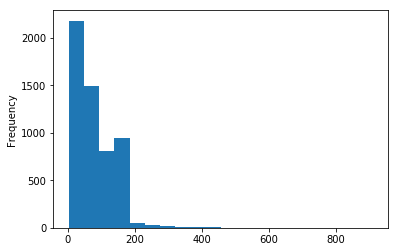

In [19]:
messages.length.plot(bins=20, kind='hist')

Looks like there are enough messages of length upto 150 but very few messages are too long(>400).

Reading  exact values and properties from graph is hard.
Let's try to summarize this distribution(hist) of sms messages length

In [20]:
messages.length.describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

**max** value tell us there are messages  of length 910. What are these message?

In [21]:
print('Longest message is {}'.format(list(messages.message[messages.length > 900])))

Longest message is ["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


is there any difference in message length between spam and ham?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27f69b1ac8>,
      dtype=object)

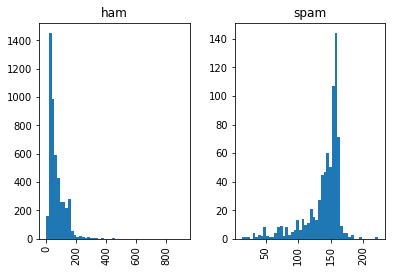

In [22]:
messages.hist(column='length', by='label', bins=50)

See how length of ham messages is clustered rougly around [20 10] and spam messages length is clustered around 150.
**Looks like** on average spam messages has more length.

**Q2:** Can you write the code to summarize above per class disribution of messages length(**to be more precise about observation**). i.e. can you group messages and describe their length?

In [23]:
# Write your answer here

In [24]:
# answer
messages.groupby('label')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4827.0,71.471929,58.326643,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.676037,28.871250,13.0,133.0,149.0,157.0,223.0


## Computer only understand scalar or vector or matrices. We need to convert text to vectors(feature).


# Feature engineering

we'll use the [Bag-of-words model](https://en.wikipedia.org/wiki/Bag-of-words_model) approach for creating feature
representing our sms message.

### Bog of word model for document:

In BOG  we treat document as collection of word without any order. 

- **Bernoulli document model: mes**sage is represented by a binary feature vector of absence or presence of word.
- **Multinomial document model**: message is represented by an integer feature vector of word frequency.

 Later we will see
there are better model for sentence or document representation **where words order matters**. There are model which takes into account the word order like [N-gram](https://en.wikipedia.org/wiki/N-gram) etc.
Infact Deep learning has enabled us to learn better embedding of words using context of words(co occurance).
We will try to use them in **deep learning section** [**optional** see [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)]

Converting to vector is bit involved and require a good understanding of NLP(natural language processing).

But as we can imagine to convert a message into vector we need to
1. convert a sentence into word token
2. Normalize the words i.e do we care about(do they cary some infomration) Capital form(Cow vs cow), inflected form ("goes" vs. "go")
3. Build a dictionary of words and map the messages into vector using this dictionary
4. Finally train a  Naive Bayes model

**Again we will use a python library [Textblob](http://textblob.readthedocs.io/en/dev/quickstart.html) to do heavy lifting for us.**

write a function that will split a message into its individual words

In [25]:
def split_into_tokens(message):
    #message = unicode(message, 'utf8')  # convert bytes into proper unicode
    return TextBlob(message).words

Here are some of the original texts again:

In [26]:
messages.message.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

same messages, tokenized 

In [27]:
messages.message.head().apply(split_into_tokens)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, do, n't, think, he, goes, to, usf, he...
Name: message, dtype: object

With textblob, normalize words into their base form [lemmas](https://en.wikipedia.org/wiki/Lemmatisation) with

In [28]:
import string
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    no_punc = []
    # for each word, take its "base form" = lemma 
    words =  [word.lemma for word in words]
    for word in words:
        line = "".join(char for char in word if char not in string.punctuation)
        no_punc.append(line)
    return no_punc    
        

# see how head portion changes
preprocessed_messages =messages.message.apply(split_into_lemmas)

In [29]:
preprocessed_messages.head()

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, do, nt, think, he, go, to, usf, he, l...
Name: message, dtype: object

In [30]:
messages_labels = messages.label
messages_labels.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [31]:
preprocessed_messages.shape

(5574,)

See how **goes** to changed to **go**. We can do some more pre processing  with some justifucation but let's go
ahead with current manipulation.

There are lots of other natural language processing libraries in python for performing above activities like
- [Spacy](https://spacy.io/)
- [nltk](https://www.nltk.org/)

- One of the fundamental concenrm in machine learning is *Generalization*, **how well our machine is going to work well on unseen/future data. Does it generalize well on future data**?
- If we wanted to do well on given data, why  would we even bother to build an algorithm. We can just store the data and do a lookup for any sms message.

We will come back to this question later in the course when we talk about **alogorith/model selection and evaluation**.

One simple way to unswer above question is to hide some portion of dataset and use remaining dataset for building the model i.e. learning the parameters. Once we have build the model, we can report some number/measure on hidden dataset to tell how well the model will perform on unseen data.

# Let's partition our data into training and test set

In [32]:
training_set_portion =.9 # keep 80 % data for traning
#LEt's create some random integer index and partition the data
number_of_examples = preprocessed_messages.shape[0]
print('Total examples are {}'.format(number_of_examples))
np.random.seed(0) # to make sure multiple run give same result
random_index = np.random.permutation(range(number_of_examples))
training_set_size = int(number_of_examples*training_set_portion)
print('train set size is {} test set size is {}'.format(training_set_size,number_of_examples - training_set_size))

Total examples are 5574
train set size is 5016 test set size is 558


In [33]:
training_messages = preprocessed_messages[random_index[:training_set_size]]
training_labels = messages_labels[random_index[:training_set_size]]
test_messages = preprocessed_messages[random_index[training_set_size:]]
test_labels = messages_labels[random_index[training_set_size:]]

print('Shape of training X {} and train Y {}'.format(training_messages.shape, training_labels.shape))
print('Shape of test X {} and test Y {}'.format(test_messages.shape, test_labels.shape))

Shape of training X (5016,) and train Y (5016,)
Shape of test X (558,) and test Y (558,)


**We'll use training messages only for building the model**

- We need to convert each message into count vector. Where a ham/spam message is mapped to vector representing each word frequency in the message
    + To do this we need to build a dictionary of words first

In [34]:
# How many unique words are in our dictionary
unique_word = set()
for message in training_messages:
    unique_word.update(message)

In [35]:
# how many words in vocabulary
len(unique_word)

8316

We will encode each message into **7798** dimentional vector. In meachine earning we call acitivity like this feature engineering.

In [36]:
#let' use default dictionary to assign each word a unique location in feature vector
from collections import defaultdict, Counter
word_to_index_dict = defaultdict(int)
for index , word in enumerate(unique_word):
    word_to_index_dict[word] = index

In [37]:
# Let's create a reverse dictionary  for mapping index to word. It will help in debugging etc.
# See how we used dictionary comprehension
index_to_word_dict = { value:key  for key, value in word_to_index_dict.items()}

In [38]:
print(training_messages.shape)

(5016,)


## we will convert each 4459 messages into 7798 dimensional vector

## Let's create a numpy integer matrix of 4459X7798, initialized with zero

In [39]:
# each row in training_X is our x_i
training_X = np.zeros((len(training_messages), len(unique_word)), dtype=int)
print(training_X.shape)

(5016, 8316)


In [40]:
# Let's go over each training message, count the words using Counter and set count in feature vector for sms 

for sms_no, sms in enumerate(training_messages):
    word_freq =  Counter(sms)
    # setting the word count in sms_no row of sms_features
    for word, freq in word_freq.items():
        index_of_word = word_to_index_dict[word]
        training_X[sms_no][index_of_word] = freq
    

## Writing code is easy :)
## But how we check if it is correct
## Let's do some primitive checking on a sms message

In [41]:
sms_no =3
message_word_count = Counter(training_messages.iloc[sms_no])
print(message_word_count)

# Let' check non zero location in sms_features to see if count is set properly
print('##Encoding for sms no {} in feature vector is ##'.format(sms_no))
for i, count in enumerate(training_X[sms_no]):
    if count >0:
        print(index_to_word_dict[i], count)


Counter({'if': 2, 'you': 2, 'ok': 1, 'can': 1, 'be': 1, 'later': 1, 'showing': 1, 'around': 1, '8830': 1, 'want': 1, 'cld': 1, 'have': 1, 'drink': 1, 'before': 1, 'wld': 1, 'prefer': 1, 'not': 1, 'to': 1, 'spend': 1, 'money': 1, 'on': 1, 'nosh': 1, 'do': 1, 'nt': 1, 'mind': 1, 'a': 1, 'doing': 1, 'that': 1, 'nxt': 1, 'wk': 1})
##Encoding for sms no 3 in feature vector is ##
ok 1
that 1
do 1
prefer 1
nosh 1
nt 1
wld 1
around 1
wk 1
have 1
drink 1
nxt 1
be 1
before 1
showing 1
spend 1
on 1
a 1
later 1
mind 1
want 1
can 1
8830 1
cld 1
if 2
you 2
money 1
not 1
to 1
doing 1


<font color= 'red' > Make sure Counter and encoding gives same results in above cell </font>

# We have successfully converted sms message into feature vector and
# collected them in numpy matrix

<img src="https://images.unsplash.com/photo-1522098543979-ffc7f79a56c4?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjEyMDd9&s=3deb7fa95bb0a7343a38b724cbee4b5a&auto=format&fit=crop&w=1868&q=80" alt="Well done" width="500" height="400">


# Let's convert ham and spam label to 1 and 0  respectively

In [42]:
training_labels.tail(7)# can check from head too

1201     ham
4260     ham
424     spam
4421     ham
3715     ham
664      ham
350      ham
Name: label, dtype: object

In [43]:
# This is our training_y value
training_y = (training_labels.values == 'ham').astype(int)

In [44]:
# Let's check some lable value
training_y[-7:]


array([1, 1, 0, 1, 1, 1, 1])

# Training the model or estimating parameters $\theta$ of the model
Now we have vector feature representation $x_i$ of our sms samples. 

Let review some theory and see what parameters we need to estimate for Naive bayes model.

We know that we classify a sms $x_i$  to a class c= HAM or c= SPAM which has maximum vlaue of $P(c|x_i).$ Using bayes rule we have $P(c|x_i) = \frac{P(x_i|c) P(c)}{P(x_i)} \propto P(x_i|c) P(c)$ as normalization doesn't depend on class label. 

In naive bayes assumption for modelling class conditional densities we have $P(x_i|c) = \prod_j^D P(x_{ij}|c)$ assuming  $x_i \in \mathbb{R}^D$

**Note:$D$ is size of our vacabulary ($|V|$) build from sms document corpus i.e D = |V|**

**what probability distribution we should choose for $P(x_{ij}|c)?$ **

Each value $x_{ij}$ is an integer values and there are total $D$ different unique values(word). This definetly suits a **$D$ side die** situation. In our case die has $D = 8771$ sides= size of feature vector.

**Infact once we have learned $P(x_{ij}|c)?$ i.e probabilites of different sides for ham and spam die,**
** ham or spam sms generation in bag of word model is nothing but rolling ham or spam die. Pick the word dictated by the side of die throw.**

Now we  know that we can put multinomial distribution for such situation. Hence
<font size = 6> 
$P(x_i|c) = \frac{n_i}{\prod_j^D x_{ij|C}} P(c) \prod^{D} P(w_j|c)^{x_{ij}} \propto P(c) \prod^{D} P(w_j|c)^{x_{ij}}$ 
</font>
as normalization doesn't depend on class label

We know that using MLE estimate we have
<font size = 8> 
$P(w_j|c) = \frac{\sum_{i=1}^N x_{ij}\mathbb{1}(y_i=c)}{\sum_{k=1}^{D} \sum_{i=1}^N x_{ik}\mathbb{1}(y_i=c)}.$ 
</font>
where $\mathbb{1}$ is indicator function.


- Hence the parameters are nothing  nothing but relative frequency of $w_j$ in documents of class c=SPAM or c= HAM
with respect to the total number of words in documents of that class.

- We can sum our numpy sms_feature matrix along row or dim 0 to get total frequency of each feature for ham and spam class
- normalize total frequency of each feature with total frequency of all the features for each class.
- prior class  densites are estimated as $P(c) = \frac{N_c}{N}.$ Where $N_c$ are numer of document in class k.

- So we have to learn 8771 parameters for each die
- and 2  class densities.


# Let's learn the parameters for c= ham(1) and c= spam(1)



In [45]:
# First estimate for ham

# summing up per feature count
training_X_ham = training_X[training_y ==1]
print(training_X_ham.shape)
per_feature_count =np.sum(training_X_ham, axis = 0)
per_feature_count.shape

np.count_nonzero(per_feature_count)
parameters_w_ham = per_feature_count/(np.sum(per_feature_count))

parameters_w_ham

(4346, 8316)


array([0.00000000e+00, 7.86114081e-05, 1.57222816e-05, ...,
       1.57222816e-05, 2.51556506e-04, 1.57222816e-05])

# Let's estimate paramters for spam

In [46]:
# summing up per feature count
training_X_spam = training_X[training_y ==0]
print(training_X_spam.shape)
per_feature_count =np.sum(training_X_spam, axis = 0)
per_feature_count.shape
np.count_nonzero(per_feature_count)
parameters_w_spam = per_feature_count/(np.sum(per_feature_count))
parameters_w_spam

(670, 8316)


array([6.20155039e-05, 4.34108527e-04, 0.00000000e+00, ...,
       0.00000000e+00, 6.82170543e-04, 0.00000000e+00])

# Zero probability issue
As we can see some of the probablity can be zero. It will create problem when we estimate probability of a new document in test set if that wor was not in training set. 

If any of the term in product is zero it will result in zero product. If any of the class don't have this term then probability of this document for any class will be zero. If we play log trcik for comparing product of probability, we will be in troble as log of zero not defined too.

One way to handle this situtation to add a fake 1 count of the word in each class. This is called Laplace law of scession or add one smoothing.

We estimate
<font size = 8> 
$P(w_j|c) = \frac{\sum_{i=1}^N x_{ij}\mathbb{1}(y_i=c) + 1}{\sum_{k=1}^{D} \sum_{i=1}^N x_{ik}\mathbb{1}(y_i=c) + |V|}.$ 
</font>
where $\mathbb{1}$ is indicator function and $|V|$ is size of our dictionary.

This can be done by adding a row of ones to training_X_ham and training_X_spam


# New parameters

In [47]:
training_X_ham1 = np.concatenate((training_X_ham, np.ones((1,training_X_ham.shape[1]), dtype= int)), axis =0)

per_feature_count =np.sum(training_X_ham1, axis = 0)
per_feature_count.shape

np.count_nonzero(per_feature_count)
parameters_w_ham = per_feature_count/(np.sum(per_feature_count))

parameters_w_ham

array([1.39043382e-05, 8.34260289e-05, 2.78086763e-05, ...,
       2.78086763e-05, 2.36373749e-04, 2.78086763e-05])

In [48]:
training_X_spam1 = np.concatenate((training_X_spam, np.ones((1,training_X_spam.shape[1]), dtype= int)), axis =0)

per_feature_count =np.sum(training_X_spam1, axis = 0)
per_feature_count.shape

np.count_nonzero(per_feature_count)
parameters_w_spam = per_feature_count/(np.sum(per_feature_count))

parameters_w_spam

array([8.18297124e-05, 3.27318849e-04, 4.09148562e-05, ...,
       4.09148562e-05, 4.90978274e-04, 4.09148562e-05])

# class probabilities

In [49]:
ham = len(training_X_ham)/(len(training_X_ham) + len(training_X_spam))
spam = 1- ham
ham,spam

(0.8664274322169059, 0.13357256778309412)

# Now we have learned the model(i.e its parameters, probabilities of different words occuring in ham die and spam die)

# How good is our model ?
- Let take out our test data convert to count feature vector using same dictionars
- Calulate the probability if test data belonging to Ham or spam. i.e if probability if >=.5 Ham otherwise spam
 or we can calulate the ratio
 <font size = 5>
 $\frac{P(x_{test}|c=ham)}{P(x_{test}|c=spam)} = \frac{ P(c=ham)  \prod^{D}_{j =1} P(w_j|c=ham)^{x_{test,j}}} { P(c= spam)\prod^{D}_{j=1} P(w_j|c=spam)^{x_{test, j}}}$ 
 </font>
 
 **Note:Generally such large product of probabilties, turns out to be zero because of computer representation limits of real numbers.**
 
 Another option is let take log on right hand side and after some manipulation one can show that if
 <font size = 5>
  $\sum_{j =1}^{D} (x_{test,j})log (P(w_j|c=ham)) +log(P(c= ham)) \ge log(P(c=spam))+ \sum_{j =1}^{D} (x_{test,j})log (P(w_j|c=spam))$
  
  </font>
  
 then it is ham other wise spam
 
 
 
 if it is bigger than one then it is ham , otherwise spam
 
- Compare with test data label and let's report accuracy and confusion matrix

Let's do these steps

In [50]:
test_X = np.zeros((len(test_messages), len(unique_word)), dtype=int)
print(test_X.shape)
len(word_to_index_dict)

(558, 8316)


8316

In [51]:
feature = np.zeros((1, len(word_to_index_dict)), dtype=int)
feature.shape
test_X[1].shape

(8316,)

In [52]:
def build_feature(sms, word_to_index_dict):
    feature = np.zeros((len(word_to_index_dict),), dtype=int)
    word_freq =  Counter(sms)
    # setting the word count in sms_no row of sms_features
    for word, freq in word_freq.items():
        if word in word_to_index_dict:
            index_of_word = word_to_index_dict[word]
            feature[index_of_word] = freq
    return feature        
    
for sms_no, sms in enumerate(test_messages):
    test_X[sms_no] = build_feature(sms, word_to_index_dict)


# Again checking feature creation/encoding

In [53]:
sms_no =2
message_word_count = Counter(test_messages.iloc[sms_no])
print(message_word_count)

# Let' check non zero location in sms_features to see if count is set properly
print('##Encoding for sms no {} in feature vector is ##'.format(sms_no))
for i, count in enumerate(test_X[sms_no]):
    if count >0:
        print(index_to_word_dict[i], count)


Counter({'hello': 1, 'they': 1, 'are': 1, 'going': 1, 'to': 1, 'the': 1, 'village': 1, 'pub': 1, 'at': 1, '8': 1, 'so': 1, 'either': 1, 'come': 1, 'here': 1, 'or': 1, 'there': 1, 'accordingly': 1, 'ok': 1})
##Encoding for sms no 2 in feature vector is ##
either 1
going 1
there 1
are 1
ok 1
the 1
here 1
village 1
8 1
hello 1
they 1
come 1
or 1
accordingly 1
at 1
pub 1
so 1
to 1


## We need test_y this value to compare labels and calculate accuracy

In [54]:
# This is our test_y value
test_y = (test_labels.values == 'ham').astype(int)


# Finally let's calculate ham/spam probability for test messages

In [55]:
ham_score = np.zeros_like(test_y,dtype=float)
spam_score = np.zeros_like(test_y,dtype=float)
ham_score.shape, spam_score.shape# just printing to make sure shape is right

((558,), (558,))

In [56]:
def calculate_score(parameters,test_sms, class_prior):
    return np.sum(np.log(np.power(parameters,test_sms))) + class_prior

for idx, test_sms in enumerate(test_X):# this will fetch row by row, encoded test messages
    ham_score[idx] = calculate_score(parameters_w_ham,test_sms, np.log(ham))
    spam_score[idx] = calculate_score(parameters_w_spam, test_sms, np.log(spam))

    

In [57]:
ham_score[0:2], spam_score[0:2], test_y[0:2]

(array([ -67.64849451, -155.29533957]),
 array([ -85.58871614, -135.47357743]),
 array([1, 0]))

In [58]:
ham_or_spam = (ham_score >= spam_score).astype(int)

In [59]:
ham_or_spam[0:5], test_y[0:5]

(array([1, 0, 1, 0, 1]), array([1, 0, 1, 0, 1]))

In [60]:
#Checking if calculation was right
ham_score[0:3], spam_score[0:5], np.log(ham), np.log(spam)

(array([ -67.64849451, -155.29533957, -121.14388609]),
 array([ -85.58871614, -135.47357743, -137.02230242, -196.53240289,
        -155.6703781 ]),
 -0.1433769214963817,
 -2.0131103699277446)

# Accuracy calculation

In [61]:
accuracy = np.mean((ham_or_spam == test_y))

print('accuracy on test set is {}'.format(accuracy))

accuracy on test set is 0.982078853046595


In [62]:
def predict_ham_or_spam(message):
    feature = build_feature(message, word_to_index_dict)
    ham_score = calculate_score(parameters_w_ham,feature, np.log(ham))
    spam_score = calculate_score(parameters_w_spam, feature, np.log(spam))
    
    return 'ham' if ham_score > spam_score else 'spam'
    
    


# Let's see how it works on new spam message which is a modified  training message

In [63]:
predict_ham_or_spam(' your mailbox messaging sm alert call back 09056242159 to retrieve your message'.split())

'spam'

<font color = 'BlueViolet' size = 6> Try some messages with same distribution as training messages to see how well it does </font>

<font color = 'BlueViolet' size = 6> Following code will show why python eco system shines.
We will use python library sklearn to build  multinomial Naive Bayes classifier </font>

We will use CountVectorizer from **sklearn** to convert each  message into **count vector**.   Any row of this matrix represents an example(count of various words in the message).

**Let's create the transformation class first**

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
clf = MultinomialNB()


In [66]:
clf.fit(training_X, training_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
clf.score(test_X, test_y)

0.982078853046595